___
# PROJETO 1

## <font color='red'>Lucas Chen Alba</font>
___

## <font color='blue'>Análise de dados da população aposentada em 2014</font>

## Introdução

Neste projeto pretendo analisar a renda dos aposentados, separando-os nas diferentes regiões do Brasil, e se possível
relacionar variáveis com a possível diferença na renda dos aposentados. Creio que as rendas dos aposentados
refletem bastante nos seus passados então pretendo utilizar variáveis que reflitam o seu passado antes de se aposentarem.

Para isto utilizei os dados disponibilizados pelo PNAD de 2014.


___
## Análise e Resultados

In [453]:
#Importando bibliotecas a serem utilizadas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [454]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\chend\Documents\CD\Projeto 1


In [596]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [456]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [457]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
#pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

# Se quiser economizar espaço, use o arquivo Zip
pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")
#Optei pela leitura em .zip, pois o Jupyter Notebook não aceita arquivos maiores que 25Mb,
#se não teria utilizado o .txt pela leitura mais rápida

In [546]:
'''Definindo 'n', o número total de aposentados, que será utilizado depois para obter os dados em relação ao total,
e não em números absolutos'''

n = aposentados.shape[0]
print (n)

38643


In [ ]:
#pnad2014.head()
#pnad2014

In [472]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [473]:
pnad2014.columns = estrutura.Coluna

In [474]:
pnad2014.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [484]:
#Restringindo o banco de dados para apenas os aposentados

'''
    V9122 = Era aposentado de instituto de previdência federal (INSS),
estadual ou municipal ou do governo federal na semana de referência
'''

aposentados = pnad2014[pnad2014.V9122 == 2]
aposentados.shape

(38643, 341)

In [558]:
aposentados.regiao = aposentados.iloc[:,1]

In [486]:
aposentados.regiao[(aposentados.regiao == 11 )| (aposentados.regiao == 12 )| (aposentados.regiao == 13 )| (aposentados.regiao == 14 )| (aposentados.regiao == 15 )| (aposentados.regiao == 16 )| (aposentados.regiao == 17)] = 'Norte'
aposentados.regiao[(aposentados.regiao == 21 )| (aposentados.regiao == 22 )| (aposentados.regiao == 23 )| (aposentados.regiao == 24 )| (aposentados.regiao == 25 )| (aposentados.regiao == 26 )| (aposentados.regiao == 27 )| (aposentados.regiao == 28 )| (aposentados.regiao == 29)] = 'Nordeste'
aposentados.regiao[(aposentados.regiao == 31 )| (aposentados.regiao == 32 )| (aposentados.regiao == 33 )| (aposentados.regiao == 35)] = 'Sudeste'
aposentados.regiao[(aposentados.regiao == 41 )| (aposentados.regiao == 42 )| (aposentados.regiao == 43)] = "Sul"
aposentados.regiao[(aposentados.regiao == 50 )| (aposentados.regiao == 51 )| (aposentados.regiao == 52 )| (aposentados.regiao == 53)] = 'Centroeste'

C:\Users\chend\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [581]:
aposentados.regiao = aposentados.regiao.astype('category')

#V6007 = Curso mais elevado que frequentou
aposentados.V6007 = aposentados.V6007.astype('category')

#V4803 = Anos de estudo
aposentados.V4803 = aposentados.V4803.astype('category')



C:\Users\chend\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [597]:
#aposentados.V6007.cat.categories = ['Primáro', 'Médio 1º ciclo', 'Médio 2º ciclo', 'E.fund.', 'E.médio', 'Ed. jovens e adultos e.fund.', 'Ed. jovens e adultos e. médio', 'Superior', 'Mestrado ou doutorado', 'Alfabetização de jovens e adultos', 'Creche', 'Classe de alfabetização', 'Maternal']

#print('Curso mais alto frequentado:')
#ut1 = (aposentados.V6007.value_counts()/n*100).round(decimals=1).reindex(['Primáro', 'Médio 1º ciclo', 'Médio 2º ciclo', 'E.fund.', 'E.médio', 'Ed. jovens e adultos e.fund.', 'Ed. jovens e adultos e. médio', 'Superior', 'Mestrado ou doutorado', 'Alfabetização de jovens e adultos', 'Creche', 'Classe de alfabetização', 'Maternal'])
#print(ut1,'\n')

In [598]:
#aposentados.V4803.cat.categories = ['Sem instrução', '1 ano', '2 anos', '3 anos', '4 anos', '5 anos', '6 anos', '7 anos', '8 anos', '9 anos', '10 anos', '11 anos', '12 anos', '13 anos', '14 anos', '15 anos', 'Não determinados']
#aposentados.V4803.value_counts()

In [599]:
#print('Curso mais alto frequentado:')
#ut1 = (aposentados.V6007.value_counts()/n*100).round(decimals=1).reindex(['Primáro', 'Médio 1º ciclo', 'Médio 2º ciclo', 'E.fund.', 'E.médio', 'Ed. jovens e adultos e.fund.', 'Ed. jovens e adultos e. médio', 'Superior', 'Mestrado ou doutorado', 'Alfabetização de jovens e adultos', 'Creche', 'Classe de alfabetização', 'Maternal'])
#print(ut1,'\n')

In [600]:
'''Analisando a variável renda dos aposentados, V4742 = Rendimento mensal domiciliar per capita.
O intuito disso é analisar a renda das diferentes regiões do Brasil, o esperado é que a renda
do sudeste seja maior do que as demais regiões'''

#aposentados.V4742.value_counts().head(15)

'Analisando a variável renda dos aposentados, V4742 = Rendimento mensal domiciliar per capita.\nO intuito disso é analisar a renda das diferentes regiões do Brasil, o esperado é que a renda\ndo sudeste seja maior do que as demais regiões'

In [602]:
aposentados.V4742.describe()

C:\Users\chend\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    3.861400e+04
mean     4.529445e+10
std      2.079519e+11
min      8.000000e+01
25%               NaN
50%               NaN
75%               NaN
max      1.000000e+12
Name: V4742, dtype: float64

In [559]:
#Definindo as faixas de renda a serem analisadas

faixa1 = arange(0, 3000, 100)
#faixa = range(5, 100, 5)
rendafaixas = pd.cut(aposentados.V4742, faixa1)

In [511]:
aposentados.regiao.value_counts()

Sudeste       12537
Nordeste      10918
Sul            7941
Norte          3990
Centroeste     3257
Name: UF   , dtype: int64

In [529]:
#Gerando a tabela de renda x região

ct1 = pd.crosstab(aposentados.regiao, rendafaixas,margins=False)
ct1

V4742,"(0, 100]","(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 600]","(600, 700]","(700, 800]","(800, 900]","(900, 1000]",...,"(1900, 2000]","(2000, 2100]","(2100, 2200]","(2200, 2300]","(2300, 2400]","(2400, 2500]","(2500, 2600]","(2600, 2700]","(2700, 2800]","(2800, 2900]"
UF,,,,,,,,,,,,,,,,,,,,,
Centroeste,0,14,45,126,131,124,134,671,169,146,...,45,30,25,25,28,33,10,15,18,21
Nordeste,2,137,475,943,1045,860,521,2705,530,414,...,92,58,54,39,45,46,18,37,26,34
Norte,0,68,160,339,352,287,233,909,205,157,...,32,27,30,20,14,16,9,13,18,13
Sudeste,0,39,167,493,452,468,424,2124,702,697,...,226,120,154,133,104,117,88,91,108,83
Sul,0,23,65,218,217,241,229,1480,465,438,...,148,111,96,98,63,62,54,40,64,45


In [530]:
#Agora gerando-a com valores relativos ao total de aposentados

ct1r = (ct1/len(aposentados)*100).round(decimals=2)
ct1r

V4742,"(0, 100]","(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 600]","(600, 700]","(700, 800]","(800, 900]","(900, 1000]",...,"(1900, 2000]","(2000, 2100]","(2100, 2200]","(2200, 2300]","(2300, 2400]","(2400, 2500]","(2500, 2600]","(2600, 2700]","(2700, 2800]","(2800, 2900]"
UF,,,,,,,,,,,,,,,,,,,,,
Centroeste,0.00,0.04,0.12,0.33,0.34,0.32,0.35,1.74,0.44,0.38,...,0.12,0.08,0.06,0.06,0.07,0.09,0.03,0.04,0.05,0.05
Nordeste,0.01,0.35,1.23,2.44,2.70,2.23,1.35,7.00,1.37,1.07,...,0.24,0.15,0.14,0.10,0.12,0.12,0.05,0.10,0.07,0.09
Norte,0.00,0.18,0.41,0.88,0.91,0.74,0.60,2.35,0.53,0.41,...,0.08,0.07,0.08,0.05,0.04,0.04,0.02,0.03,0.05,0.03
Sudeste,0.00,0.10,0.43,1.28,1.17,1.21,1.10,5.50,1.82,1.80,...,0.58,0.31,0.40,0.34,0.27,0.30,0.23,0.24,0.28,0.21
Sul,0.00,0.06,0.17,0.56,0.56,0.62,0.59,3.83,1.20,1.13,...,0.38,0.29,0.25,0.25,0.16,0.16,0.14,0.10,0.17,0.12


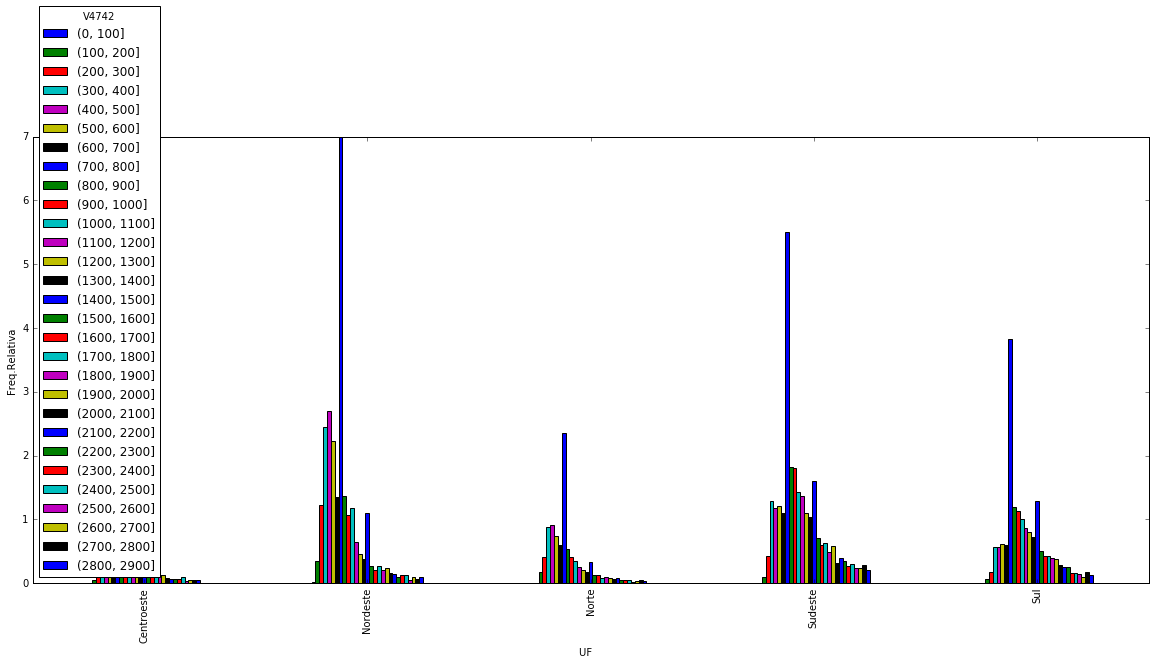

In [531]:
#Gerando gráfico região x renda

plot1r = ct1r.plot(kind='bar', figsize=(20,8))
plt.ylabel('Freq.Relativa')

In [524]:
'''De acordo com os resultados obtidos o sudeste realmente apresenta a maior renda, porém o sul também
apresenta uma renda alta em relação às demais regiões, portanto a partir de agora o objetivo é tentar relacionar
outras variáveis fornecidas pelo PNAD 2014 com esta diferença na renda dos aposentados da região sul e sudeste com
as demais regiões'''

'De acordo com os resultados obtidos o sudeste realmente apresenta a maior renda, porém o sul também\napresenta uma renda alta em relação às demais regiões, então a partir de agora o objetivo é tentar relacionar\noutras variáveis fornecidas pelo PNAD 2014 com esta diferença na renda dos aposentados'

In [603]:
#Testando o V6007, curso mais elevado realizados pelos pesquisados
#aposentados.V6007.value_counts()

In [572]:
#Gerando a tabela de região x curso mais elevado realizado

ct2 = pd.crosstab(aposentados.regiao, aposentados.V6007,margins=False)
ct2

V6007,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
UF,,,,,,,,,,,,,
Centroeste,1132,205,170,275,240,39,29,432,39,12,0,24,0
Nordeste,3657,608,595,758,657,155,72,816,42,187,1,388,4
Norte,1491,196,162,327,300,58,19,289,16,26,0,33,1
Sudeste,4843,1086,902,887,1082,138,179,1894,89,59,0,36,0
Sul,3690,613,381,640,696,84,119,968,63,27,0,12,1


In [551]:
#Agora gerando-a com valores relativos ao total de aposentados

ct2r = (ct2/len(aposentados)*100).round(decimals=3)
ct2r

V6007,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
UF,,,,,,,,,,,,,
Centroeste,2.929,0.530,0.440,0.712,0.621,0.101,0.075,1.118,0.101,0.031,0.000,0.062,0.000
Nordeste,9.464,1.573,1.540,1.962,1.700,0.401,0.186,2.112,0.109,0.484,0.003,1.004,0.010
Norte,3.858,0.507,0.419,0.846,0.776,0.150,0.049,0.748,0.041,0.067,0.000,0.085,0.003
Sudeste,12.533,2.810,2.334,2.295,2.800,0.357,0.463,4.901,0.230,0.153,0.000,0.093,0.000
Sul,9.549,1.586,0.986,1.656,1.801,0.217,0.308,2.505,0.163,0.070,0.000,0.031,0.003


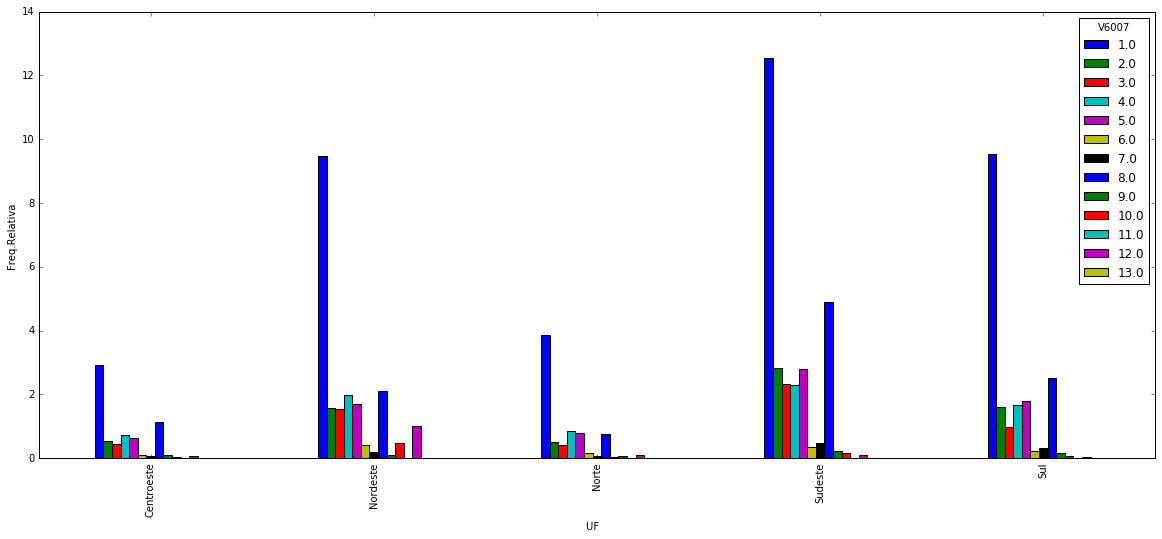

In [574]:
#Gráfico com as frequências relativas do curso amis elevado atendido pelos aposentados

plot2r = ct2r.plot(kind='bar', figsize=(20,8))
plt.ylabel('Freq.Relativa')

Aconteceu alguma coisa, e o cat.categories não funcionou
então coloquei a legenda aqui mesmo


1: Elementar (primário)

2: Médio 1º ciclo (ginasial, etc.)

3: Médio 2º ciclo (científico, clássico, etc.)

4: Regular do ensino fundamental ou do 1º grau

5: Regular do ensino médio ou do 2º grau

6: Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau

7: Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau

8: Superior de graduação

9: Mestrado ou doutorado

10: Alfabetização de jovens e adultos

11: Creche

12: Classe de alfabetização - CA 

13: Maternal, jardim de infância etc.


In [591]:
#Gerando a tabela de região x anos de estudo


ct3 = pd.crosstab(aposentados.regiao, aposentados.V4803,margins=False)
ct3

V4803,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
UF,,,,,,,,,,,,,,,,,
Centroeste,876,131,187,205,436,159,88,45,221,23,32,342,48,18,39,405,2
Nordeste,4563,489,621,612,1070,469,191,136,591,54,67,1068,130,48,42,754,13
Norte,1459,164,281,309,433,194,101,45,222,26,40,356,57,16,21,261,5
Sudeste,1911,344,660,787,2618,464,311,214,1094,75,119,1734,279,90,177,1658,2
Sul,1018,242,444,657,1460,863,262,109,667,45,90,968,121,66,98,827,4


In [592]:
#Agora gerando-a com valores relativos ao total de aposentados

ct3r = (ct3/len(aposentados)*100).round(decimals=3)
ct3r

V4803,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
UF,,,,,,,,,,,,,,,,,
Centroeste,2.267,0.339,0.484,0.530,1.128,0.411,0.228,0.116,0.572,0.060,0.083,0.885,0.124,0.047,0.101,1.048,0.005
Nordeste,11.808,1.265,1.607,1.584,2.769,1.214,0.494,0.352,1.529,0.140,0.173,2.764,0.336,0.124,0.109,1.951,0.034
Norte,3.776,0.424,0.727,0.800,1.121,0.502,0.261,0.116,0.574,0.067,0.104,0.921,0.148,0.041,0.054,0.675,0.013
Sudeste,4.945,0.890,1.708,2.037,6.775,1.201,0.805,0.554,2.831,0.194,0.308,4.487,0.722,0.233,0.458,4.291,0.005
Sul,2.634,0.626,1.149,1.700,3.778,2.233,0.678,0.282,1.726,0.116,0.233,2.505,0.313,0.171,0.254,2.140,0.010


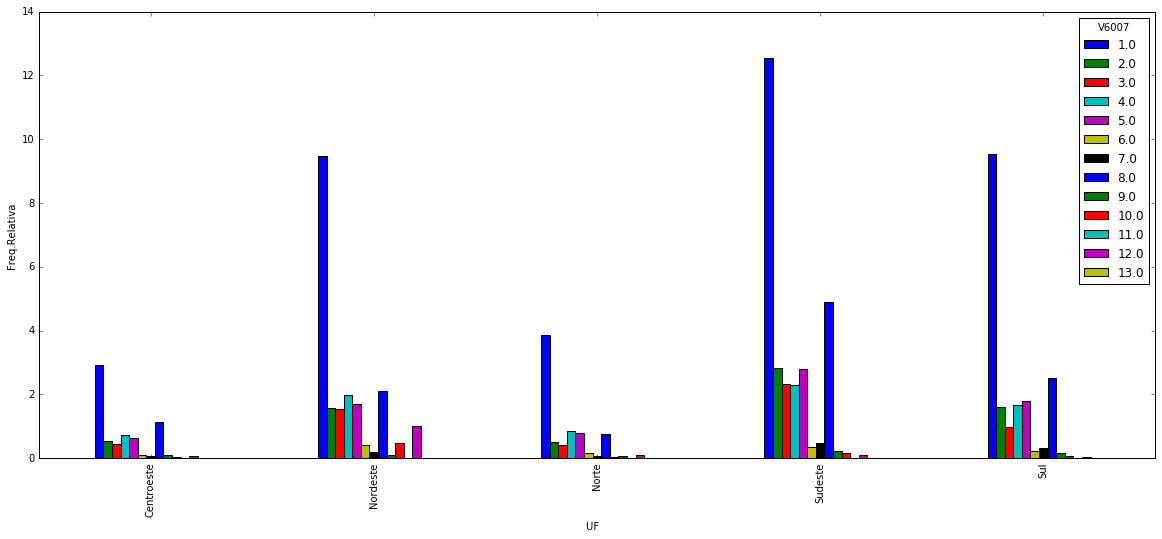

In [593]:
#Gráfico com as frequências relativas do curso mais elevado atendido pelos aposentados

plot2r = ct2r.plot(kind='bar', figsize=(20,8))
plt.ylabel('Freq.Relativa')

___
## Conclusão 

A minha proposta foi analisar as rendas domiciliares dentre os aposentados das diferentes regiões do país. O primeiro gráfico mostrou que a renda entre os aposentados do sul e sudeste é maior do que as demais regiões. Nos dois gráficos seguintes  foram mostradas duas relações parecidas com a renda, o curso mais alto atendido pelos pesquisados e o número de anos de estudo, variáveis nas quais ambos sul e sudeste mostraram-se com uma população aposentada com um nível de educação maior e com mais anos de estudo, não estão tão díspares, assim como a renda porém consegue se perceber claramente esta relação. Portanto pode-se se dizer com alguma certeza de que os anos de estudo e curso mais elevado realizado por uma pessoa afeta sim o quanto
ela deve receber de renda após se aposentar.